In [200]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install graphviz python-graphviz

!pip install -U imbalanced-learn

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [201]:
#IMPORTING THE DATASET
dataset = pd.read_excel('input_male.xlsx')
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [202]:
print(dataset)

    Caterory  Ferritin    FSH     LH  Testosterone    MDA    PC
0          1      1598   2.69   0.56          1.71  10.13  1.69
1          1      1436   5.29   0.64          2.18   8.50  1.44
2          1      3672   1.32   1.17          1.46  11.09  2.08
3          1      3013   0.77   1.19          1.56  13.66  2.06
4          1      4934   0.14   0.52          1.52  15.77  2.65
5          1      5320   0.10   0.10          0.49  16.86  2.11
6          1      3546   1.67   0.51          0.25  15.32  2.43
7          1      3305   0.26   1.01          1.61  12.92  2.35
8          1      6318   0.39   0.08          0.45  17.55  2.62
9          1      4420   0.34   1.95          2.43  12.41  2.43
10         1      1744   4.55   1.26          2.76   9.70  2.28
11         1      3832   4.72   1.25          1.73  11.10  2.01
12         1      2435   1.75   1.09          3.29  11.69  1.61
13         1      4832   1.46   0.48          0.23  15.13  2.08
14         1      3740   1.18   1.12    

In [203]:
#TRAINING DATASET
np.random.seed(10)
remove_n = 10
drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
dataset_training = dataset.drop(drop_indices)

In [204]:
print(dataset_training)

    Caterory  Ferritin    FSH     LH  Testosterone    MDA    PC
0          1      1598   2.69   0.56          1.71  10.13  1.69
1          1      1436   5.29   0.64          2.18   8.50  1.44
2          1      3672   1.32   1.17          1.46  11.09  2.08
4          1      4934   0.14   0.52          1.52  15.77  2.65
5          1      5320   0.10   0.10          0.49  16.86  2.11
8          1      6318   0.39   0.08          0.45  17.55  2.62
9          1      4420   0.34   1.95          2.43  12.41  2.43
10         1      1744   4.55   1.26          2.76   9.70  2.28
11         1      3832   4.72   1.25          1.73  11.10  2.01
12         1      2435   1.75   1.09          3.29  11.69  1.61
13         1      4832   1.46   0.48          0.23  15.13  2.08
14         1      3740   1.18   1.12          1.46   9.37  1.95
15         1      3846   4.81   0.93          1.63  14.49  2.58
16         1      4739   4.17   1.20          1.29  12.42  2.44
17         1      5694   0.02   0.19    

In [205]:
#VALIDATION DATASET
dataset_validation=dataset.sample(frac=0.2, random_state=10)

In [206]:
print(dataset_validation)

    Caterory  Ferritin   FSH     LH  Testosterone    MDA    PC
37         2       121  2.80   8.50          3.08   2.12  0.80
23         1      3439  0.94   0.79          3.87  13.97  2.28
44         2       140  7.90   9.90          5.31   2.44  0.86
42         2        39  7.80  12.60         12.38   1.99  0.87
47         2        37  7.30   5.10          8.37   1.86  0.88
20         1      1684  1.46   0.98          4.64  10.51  1.57
3          1      3013  0.77   1.19          1.56  13.66  2.06
30         2        26  5.18   7.25          3.95   3.28  0.78
7          1      3305  0.26   1.01          1.61  12.92  2.35
6          1      3546  1.67   0.51          0.25  15.32  2.43


In [207]:
X = dataset_training.iloc[:,1:7].values
y = dataset_training.iloc[:, -1].values

In [208]:
print(X)

[[1.598e+03 2.690e+00 5.600e-01 1.710e+00 1.013e+01 1.690e+00]
 [1.436e+03 5.290e+00 6.400e-01 2.180e+00 8.500e+00 1.440e+00]
 [3.672e+03 1.320e+00 1.170e+00 1.460e+00 1.109e+01 2.080e+00]
 [4.934e+03 1.400e-01 5.200e-01 1.520e+00 1.577e+01 2.650e+00]
 [5.320e+03 1.000e-01 1.000e-01 4.900e-01 1.686e+01 2.110e+00]
 [6.318e+03 3.900e-01 8.000e-02 4.500e-01 1.755e+01 2.620e+00]
 [4.420e+03 3.400e-01 1.950e+00 2.430e+00 1.241e+01 2.430e+00]
 [1.744e+03 4.550e+00 1.260e+00 2.760e+00 9.700e+00 2.280e+00]
 [3.832e+03 4.720e+00 1.250e+00 1.730e+00 1.110e+01 2.010e+00]
 [2.435e+03 1.750e+00 1.090e+00 3.290e+00 1.169e+01 1.610e+00]
 [4.832e+03 1.460e+00 4.800e-01 2.300e-01 1.513e+01 2.080e+00]
 [3.740e+03 1.180e+00 1.120e+00 1.460e+00 9.370e+00 1.950e+00]
 [3.846e+03 4.810e+00 9.300e-01 1.630e+00 1.449e+01 2.580e+00]
 [4.739e+03 4.170e+00 1.200e+00 1.290e+00 1.242e+01 2.440e+00]
 [5.694e+03 2.000e-02 1.900e-01 2.800e-01 1.686e+01 2.340e+00]
 [5.700e+03 6.700e-01 6.800e-01 4.700e-01 1.649e+01 2.4

In [209]:
print(y)

[1.69 1.44 2.08 2.65 2.11 2.62 2.43 2.28 2.01 1.61 2.08 1.95 2.58 2.44
 2.34 2.42 2.3  1.83 1.95 2.13 1.8  1.65 0.94 0.78 0.82 1.   0.91 0.89
 0.96 1.36 1.04 1.01 0.94 0.93 0.99 1.05 0.83 0.96 0.82 0.9 ]


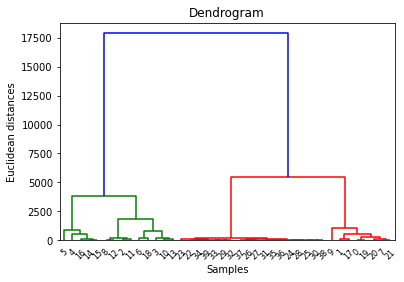

In [210]:
## Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [211]:
## Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [212]:
print(y_hc)

[1 1 0 0 3 3 0 1 0 1 0 0 0 0 3 3 3 1 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [213]:
#COUNTING THE NUMBER OF PATIENTS WITH NO DISEASE
no_disease=0
for i in y_hc:
    if i==2:
        no_disease+=1
print(no_disease)

18


In [214]:
#COUNTING THE NUMBER OF PATIENTS IN EACH SEVERITY LEVEL OF HAVING DISEASE
dis_severity=[]
cluster_0=0
cluster_1=0
cluster_3=0
for i in y_hc:
    if i!=2:
        if i==0:
            cluster_0+=1
        elif i==1:
            cluster_1+=1
        else:
            cluster_3+=1
print("Cluster 1:",cluster_1)
print("Cluster 3:",cluster_3)
print("Cluster 2:",no_disease)
print("Cluster 0:",cluster_0)

Cluster 1: 8
Cluster 3: 5
Cluster 2: 18
Cluster 0: 9


In [215]:
#CLUSTER 2: NO DISEASE
#CLUSTER 0: MILD DISEASE
#CLUSTER 1:MODERATE DISEASE
#CLUSTER 3:SEVERE DISEASE

In [216]:
#APPENDING THE CLUSTER LABELS TO THE ORIGINAL DATA
dataset_training = dataset_training.copy()
dataset_training['Cluster'] = y_hc
display(dataset_training.sort_values(by='Cluster'))

,Caterory,Ferritin,FSH,LH,Testosterone,MDA,PC,Cluster
2,1,3672,1.32,1.17,1.46,11.09,2.08,0
4,1,4934,0.14,0.52,1.52,15.77,2.65,0
22,1,4266,1.01,0.97,0.64,13.22,1.95,0
9,1,4420,0.34,1.95,2.43,12.41,2.43,0
11,1,3832,4.72,1.25,1.73,11.10,2.01,0
16,1,4739,4.17,1.20,1.29,12.42,2.44,0
13,1,4832,1.46,0.48,0.23,15.13,2.08,0
14,1,3740,1.18,1.12,1.46,9.37,1.95,0
15,1,3846,4.81,0.93,1.63,14.49,2.58,0
0,1,1598,2.69,0.56,1.71,10.13,1.69,1


In [217]:
#CLASSIFICATION

In [218]:
X2 = dataset_training.iloc[:,1:7].values
y2 = dataset_training.iloc[:, -1].values

In [219]:
print(X2)

[[1.598e+03 2.690e+00 5.600e-01 1.710e+00 1.013e+01 1.690e+00]
 [1.436e+03 5.290e+00 6.400e-01 2.180e+00 8.500e+00 1.440e+00]
 [3.672e+03 1.320e+00 1.170e+00 1.460e+00 1.109e+01 2.080e+00]
 [4.934e+03 1.400e-01 5.200e-01 1.520e+00 1.577e+01 2.650e+00]
 [5.320e+03 1.000e-01 1.000e-01 4.900e-01 1.686e+01 2.110e+00]
 [6.318e+03 3.900e-01 8.000e-02 4.500e-01 1.755e+01 2.620e+00]
 [4.420e+03 3.400e-01 1.950e+00 2.430e+00 1.241e+01 2.430e+00]
 [1.744e+03 4.550e+00 1.260e+00 2.760e+00 9.700e+00 2.280e+00]
 [3.832e+03 4.720e+00 1.250e+00 1.730e+00 1.110e+01 2.010e+00]
 [2.435e+03 1.750e+00 1.090e+00 3.290e+00 1.169e+01 1.610e+00]
 [4.832e+03 1.460e+00 4.800e-01 2.300e-01 1.513e+01 2.080e+00]
 [3.740e+03 1.180e+00 1.120e+00 1.460e+00 9.370e+00 1.950e+00]
 [3.846e+03 4.810e+00 9.300e-01 1.630e+00 1.449e+01 2.580e+00]
 [4.739e+03 4.170e+00 1.200e+00 1.290e+00 1.242e+01 2.440e+00]
 [5.694e+03 2.000e-02 1.900e-01 2.800e-01 1.686e+01 2.340e+00]
 [5.700e+03 6.700e-01 6.800e-01 4.700e-01 1.649e+01 2.4

In [220]:
print(y2)

[1 1 0 0 3 3 0 1 0 1 0 0 0 0 3 3 3 1 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [221]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X2_train, y2_train)

            tr_score.append(classifier.score(X2_train, y2_train))
            ts_score.append(classifier.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

1


In [222]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
   
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_train)
    error.append(np.mean(pred_i != y2_train))

Text(0, 0.5, 'Mean Error')

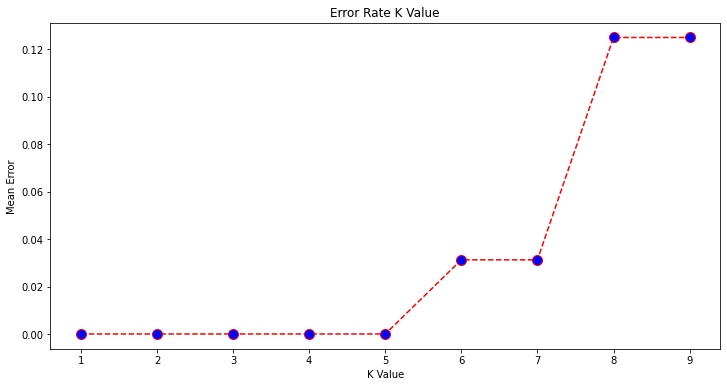

In [223]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [224]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [225]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [226]:
#KNN

In [227]:
#TRAINING KNN MODEL ON THE TRAINING SET
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, y2_train)

KNeighborsClassifier()

In [228]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[0 0]
 [2 2]
 [3 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


In [229]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X2_test)
cm1 = confusion_matrix(y2_test, y_pred)
print(cm1)
accuracy_score(y2_test, y_pred)

[[1 0 0 1]
 [0 1 0 0]
 [0 0 5 0]
 [0 0 0 0]]


0.875

In [230]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  1.0


In [231]:
#PREDICTING THE Training SET RESULTS
y_pred2 = classifier.predict(X2_train)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y2_train.reshape(len(y2_train),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [3 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]]


In [232]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier.predict(X2_train)
cm2 = confusion_matrix(y2_train, y_pred2)
print(cm2)
accuracy_score(y2_train, y_pred2)

[[ 6  0  0  1]
 [ 0  7  0  0]
 [ 0  0 13  0]
 [ 0  0  0  5]]


0.96875

In [233]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.91 %
Standard Deviation: 7.42 %


In [234]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[3]


In [235]:
##SVM

In [236]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier2 = SVC(kernel = 'linear', random_state = 0).fit(X2_train, y2_train)

            tr_score.append(classifier2.score(X2_train, y2_train))
            ts_score.append(classifier2.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

0


In [237]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [238]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X2_train, y2_train)

SVC(kernel='linear', random_state=0)

In [239]:
#PREDICTING THE TEST SET RESULTS
y_pred3 = classifier2.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred3),1), y2_test.reshape(len(y2_test),1)),1))

[[0 2]
 [2 1]
 [3 2]
 [1 3]
 [2 0]
 [2 3]
 [2 2]
 [2 0]]


In [240]:
concat1=np.column_stack((X2_test,y_pred3))
df1 = pd.DataFrame(concat1)
display(df1)

,0,1,2,3,4,5,6
0,121.0,10.27,6.26,5.27,3.98,0.94,2.0
1,1857.0,2.78,1.03,1.91,9.08,1.80,1.0
2,91.0,5.96,7.31,9.36,2.69,1.00,2.0
3,5320.0,0.10,0.10,0.49,16.86,2.11,3.0
4,4832.0,1.46,0.48,0.23,15.13,2.08,0.0
5,5700.0,0.67,0.68,0.47,16.49,2.42,3.0
6,84.0,5.10,7.90,4.69,2.19,0.96,2.0
7,3740.0,1.18,1.12,1.46,9.37,1.95,0.0


In [241]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier2.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[2 0 0 0]
 [0 1 0 0]
 [0 0 3 0]
 [0 0 0 2]]


1.0

In [242]:
#PREDICTING THE Training SET RESULTS
y_pred2 = classifier2.predict(X2_train)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y2_train.reshape(len(y2_train),1)),1))

[[0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]]


In [243]:
concat=np.column_stack((X2_train,y_pred2))
df = pd.DataFrame(concat)
display(df)

,0,1,2,3,4,5,6
0,4266.0,1.01,0.97,0.64,13.22,1.95,0.0
1,109.0,10.40,6.60,4.95,0.94,1.36,2.0
2,39.0,7.50,8.60,4.39,4.01,0.89,2.0
3,65.0,10.30,8.80,8.36,3.01,1.05,2.0
4,24.0,8.40,9.30,7.45,5.00,0.96,2.0
5,3672.0,1.32,1.17,1.46,11.09,2.08,0.0
6,125.0,8.10,7.50,9.78,3.91,0.90,2.0
7,96.0,6.60,9.20,7.67,3.34,1.04,2.0
8,123.0,6.40,6.50,10.11,4.81,0.99,2.0
9,5800.0,0.32,0.39,0.59,15.35,2.30,3.0


In [244]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X2_train)
cm2 = confusion_matrix(y2_train, y_pred2)
print(cm2)
accuracy_score(y2_train, y_pred2)

[[ 7  0  0  0]
 [ 0  7  0  0]
 [ 0  0 15  0]
 [ 0  0  0  3]]


1.0

In [245]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [246]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[3]


In [247]:
##NAIVE BAYES

In [248]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier3 = GaussianNB().fit(X2_train, y2_train)

            tr_score.append(classifier3.score(X2_train, y2_train))
            ts_score.append(classifier3.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

0


In [249]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [250]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X2_train, y2_train)

GaussianNB()

In [251]:
#PREDICTING THE TEST SET RESULTS
y_pred4 = classifier3.predict(X2_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y2_test.reshape(len(y2_test),1)),1))

[[2 2]
 [1 1]
 [2 2]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [0 0]]


In [252]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier3.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred4)
print(cm)
accuracy_score(y2_test, y_pred)

[[2 0 0 0]
 [0 1 0 0]
 [0 0 3 0]
 [0 0 0 2]]


1.0

In [253]:
#PREDICTING THE TEST SET RESULTS
y_pred5 = classifier3.predict(X2_train)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y2_train.reshape(len(y2_train),1)),1))

[[0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]]


In [254]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier3.predict(X2_train)
cm = confusion_matrix(y2_train, y_pred5)
print(cm)
accuracy_score(y2_train, y_pred5)

[[ 7  0  0  0]
 [ 0  7  0  0]
 [ 0  0 15  0]
 [ 0  0  0  3]]


1.0

In [255]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.94 %
Standard Deviation: 4.29 %


In [256]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[3]
